# Part of speech

### Installing all packets

In [1]:
# Setup spacy
#! pip install -U pip setuptools wheel
#! pip install -U spacy
#! python -m spacy download da_core_news_sm
#!pip install altair

import spacy
import pandas as pd
import re
import nltk
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

sp_danish = spacy.load("da_core_news_sm") #We use the danish packets, as our words are Danish, with few exeptions

In [5]:
import pandas as pd
df = pd.read_csv('data_danish.csv')
df

,actor,tweet,date,retweet,date_convert,@mentions,#hashtags,emojis,clean_text,language,words,without_stopwords,lemmas,proc_text,bigrams,proc_text_all
0,PlanBornefonden,"13-årige Larissa bor i Sahel-regionen, og var ...",2021-05-14 09:03:00,NaN,2021-05-14 00:00:00,NaN,NaN,,årige larissa bor i sahelregionen og var i tvu...,da,"['årige', 'larissa', 'bor', 'i', 'sahelregione...","['årige', 'larissa', 'bor', 'sahelregionen', '...","['årig', 'larissa', 'bor', 'sahelregion', 'tvi...",årig larissa bor sahelregion tvinge flygte lan...,"['årig_larissa', 'larissa_bor', 'bor_sahelregi...",årig larissa bor sahelregion tvinge flygte lan...
1,PlanBornefonden,Vi ønsker alle muslimer en god Eid i aften! Ei...,2021-05-12 14:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,vi ønsker alle muslimer en god eid i aften eid...,da,"['vi', 'ønsker', 'alle', 'muslimer', 'en', 'go...","['ønsker', 'muslimer', 'god', 'eid', 'aften', ...","['ønske', 'muslim', 'god', 'eid', 'aften', 'ei...",ønske muslim god eid aften eid mubarak,"['ønske_muslim', 'muslim_god', 'god_eid', 'eid...",ønske muslim god eid aften eid mubarak ønske_m...
2,PlanBornefonden,Kom til samtalekøkken med @BosseStine og @Clau...,2021-05-12 11:58:03,@dorthe10,2021-05-12 00:00:00,"['BosseStine, ClausMeyerDK']",dkfood,,kom til samtalekøkken med og den maj og spis e...,da,"['kom', 'til', 'samtalekøkken', 'med', 'og', '...","['kom', 'samtalekøkken', 'maj', 'spis', 'lække...","['komme', 'samtalekøkken', 'maj', 'spise', 'læ...",komme samtalekøkken maj spise lækker ret menu ...,"['komme_samtalekøkken', 'samtalekøkken_maj', '...",komme samtalekøkken maj spise lækker ret menu ...
3,PlanBornefonden,"Mali, Burkina Faso og Niger - også kendt som d...",2021-05-12 10:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,mali burkina faso og niger også kendt som det ...,da,"['mali', 'burkina', 'faso', 'og', 'niger', 'og...","['mali', 'burkina', 'faso', 'niger', 'kendt', ...","['mali', 'burkina', 'faso', 'niger', 'kendt', ...",mali burkina faso niger kendt central sahele s...,"['mali_burkina', 'burkina_faso', 'faso_niger',...",mali burkina faso niger kendt central sahele s...
4,PlanBornefonden,Vores seje kollega Iben Østergaard Markussen f...,2021-05-12 09:23:14,@dorthe10,2021-05-12 00:00:00,"['radioloud_dk, MaternityF']",NaN,,vores seje kollega iben østergaard markussen f...,da,"['vores', 'seje', 'kollega', 'iben', 'østergaa...","['seje', 'kollega', 'iben', 'østergaard', 'mar...","['sej', 'kollega', 'ibe', 'østergaard', 'marku...",sej kollega ibe østergaard markusse fortæller ...,"['sej_kollega', 'kollega_ibe', 'ibe_østergaard...",sej kollega ibe østergaard markusse fortæller ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9444,CaritasDanmark,Vores Internationale chef Betina Gollander-Jen...,2020-03-03 13:46:14,NaN,2020-03-03 00:00:00,NaN,sdg dkaid klima,,vores internationale chef betina gollanderjens...,da,"['vores', 'internationale', 'chef', 'betina', ...","['internationale', 'chef', 'betina', 'gollande...","['international', 'chef', 'betina', 'gollander...",international chef betina gollanderjensen rapp...,"['international_chef', 'chef_betina', 'betina_...",international chef betina gollanderjensen rapp...
9445,CaritasDanmark,#askeonsdag \nFasteindsamling https://t.co/...,2020-02-26 12:26:26,NaN,2020-02-26 00:00:00,['Pesitho1'],askeonsdag Klimakrise klimatilpasning,,fasteindsamling hjælp før det sidste træ er ...,da,"['fasteindsamling', 'hjælp', 'før', 'det', 'si...","['fasteindsamling', 'hjælp', 'før', 'sidste', ...","['fasteindsamling', 'hjælp', 'før', 'sidste', ...",fasteindsamling hjælp før sidste træ fælde uga...,"['fasteindsamling_hjælp', 'hjælp_før', 'før_si...",fasteindsamling hjælp før sidste træ fælde uga...
9446,CaritasDanmark,Dolores Halpin-Bachmann har arbejdet for #Cari...,2020-02-07 10:49:47,NaN,2020-02-07 00:00:00,NaN,Caritas dkaid humanitarian,,dolores halpinbachmann har arbejdet for siden ...,da,"['dolores', 'halpinbachmann', 'har', 'arbejdet...","['dolores', 'halpinbachmann', 'arbejdet',

# Using spacey to categorize words

In [6]:
%time df['nlp_spacy'] = df.clean_text.apply(sp_danish)

Wall time: 2min 13s


In [7]:
typ2common = {}
for tweet in df.nlp_spacy:
    for w in tweet:
        typ = w.pos_
        if not typ in typ2common:
            typ2common[typ] = Counter()
        typ2common[typ][w.lemma_]+=1

In [8]:
#here we see all the different word types, and the top 10 used words in these types.

most_used = []
for typ in sorted(typ2common,key=lambda x: sum(typ2common[x].values()),reverse=True):
    most = typ,typ2common[typ].most_common(20) #we take the most common 10 words
    most_used.append(most)
    print(most)

('NOUN', [('barn', 2515), ('dag', 1262), ('verden', 1151), ('år', 884), ('land', 875), ('tak', 804), ('menneske', 712), ('danmark', 562), ('brug', 562), ('læ', 472), ('kvinde', 450), ('hjælp', 426), ('flygtning', 412), ('støtte', 407), ('arbejde', 398), ('regering', 365), ('fokus', 362), ('pige', 348), ('million', 348), ('rapport', 346)])
('ADP', [('i', 11113), ('til', 6120), ('for', 5905), ('af', 4155), ('på', 4060), ('mede', 3839), ('om', 2787), ('fra', 1999), ('som', 1834), ('mod', 719), ('over', 512), ('unde', 502), ('vide', 406), ('ende', 394), ('efter', 348), ('blandt', 190), ('uden', 177), ('hos', 161), ('mellem', 129), ('gennem', 113)])
('VERB', [('være', 1402), ('have', 1106), ('få', 949), ('se', 760), ('sige', 651), ('komme', 601), ('hjælpe', 544), ('gå', 455), ('give', 444), ('gøre', 426), ('støtte', 423), ('skrive', 422), ('stå', 379), ('vise', 363), ('sætte', 354), ('sikre', 322), ('ramme', 312), ('arbejde', 301), ('gø', 270), ('fortælle', 265)])
('ADV', [('der', 2744), ('

# Top 10 most used Nouns, verbs and adj

In [9]:
#We here make a function that can give us dataframe of the word types we would like to look into.

def hapser(word_list):
    word_list = word_list[1]
    words = []
    values = []
    
    for a, b in (word_list):
        words.append(a)
        values.append(b)

    d = {'Words' : words, 'Values' : values}
    df = pd.DataFrame(data=d)
    
    return df

In [10]:
#Here we see all the word types and their indexes. We are interested in Nouns, Verbs, Adverbs, proper nouns.
#We can therefore see their indexes here, and use those with our function.
index = 0
for value in most_used:
    print(index, value[0])
    index += 1

0 NOUN
1 ADP
2 VERB
3 ADV
4 ADJ
5 AUX
6 PRON
7 DET
8 CCONJ
9 PART
10 SCONJ
11 X
12 SPACE
13 NUM
14 PROPN
15 INTJ
16 SYM
17 PUNCT


In [11]:
#Here we define the most used nouns and use our function to show them as dataframe
nouns = most_used[0]
verbs = most_used[2]
adjectives = most_used[4]
proper_nouns = most_used[14]

#here we make them all into dataframes
df_nouns = hapser(nouns)
df_verbs = hapser(verbs)
df_adj = hapser(adjectives)
df_propn = hapser(proper_nouns)

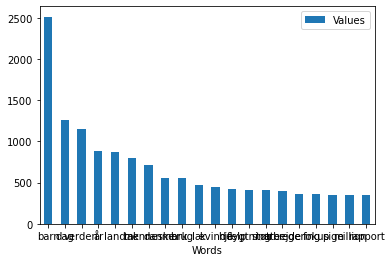

In [12]:
ax_nouns = df_nouns.plot.bar(x='Words', y='Values', rot=0)

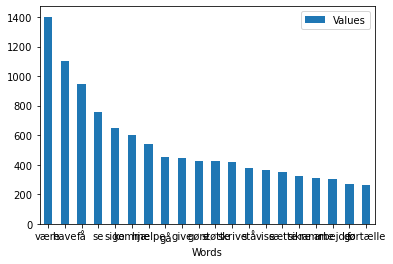

In [13]:
ax_verbs = df_verbs.plot.bar(x='Words', y='Values', rot=0)

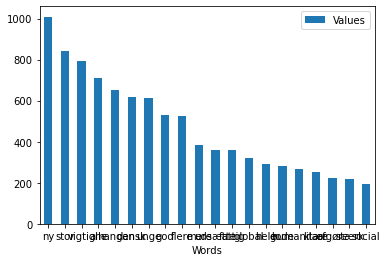

In [14]:
ax_adj = df_adj.plot.bar(x='Words', y='Values', rot=0)

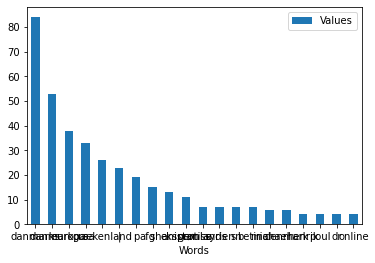

In [15]:
ax_propn = df_propn.plot.bar(x='Words', y='Values', rot=0)

# Top used word types per NGO

In [17]:
tweets_agg = df.groupby(['actor'], as_index = False).agg({'tweet': ' '.join,'clean_text': ' '.join})
tweets_agg

,actor,tweet,clean_text
0,ADRA_Danmark,Humanitær støtte til #Syrien sker i tæt samarb...,humanitær støtte til sker i tæt samarbejde med...
1,AVestegnen,"Tænk at dine børn hopper på trampolin, mens de...",tænk at dine børn hopper på trampolin mens der...
2,ActionAidDK,Det er endelig blevet tid til klimamarch igen!...,det er endelig blevet tid til klimamarch igen ...
3,BornsVilkar,"Gode tiltag i udspil fra @regeringDK, men savn...",gode tiltag i udspil fra men savner fokus på f...
4,CARE_Danmark,@CARE fejrer 75års fødselsdag\n\nCARE blev ska...,fejrer års fødselsdag care blev skabt i for a...
5,CaritasDanmark,"""Brug magt med visdom""\nHør vores generalsekre...",brug magt med visdom hør vores generalsekretær...
6,DKIndsamling,❤️️👏 Se med klokken 19.00! 👏❤️️\n\n#lillelands...,se med klokken hej igen det er forkert fns f...
7,DRC_dk,Fra jan-april forhindrede europæiske myndighed...,fra janapril forhindrede europæiske myndighede...
8,DignityDK,Danske skatteydere finansierer den såkaldte li...,danske skatteydere finansierer den såkaldte li...
9,MissionEast,Nepal er det nye Indien. FN kalder på akut ind...,nepal er det nye indien fn kalder på akut inds...


In [21]:
tweets_agg['nlp_spacy'] = tweets_agg.clean_text.apply(sp_danish)
tweets_agg

,actor,tweet,clean_text,nlp_spacy
0,ADRA_Danmark,Humanitær støtte til #Syrien sker i tæt samarb...,humanitær støtte til sker i tæt samarbejde med...,"(humanitær, støtte, til, sker, i, tæt, samarbe..."
1,AVestegnen,"Tænk at dine børn hopper på trampolin, mens de...",tænk at dine børn hopper på trampolin mens der...,"(tænk, at, dine, børn, hopper, på, trampolin, ..."
2,ActionAidDK,Det er endelig blevet tid til klimamarch igen!...,det er endelig blevet tid til klimamarch igen ...,"(det, er, endelig, blevet, tid, til, klimamarc..."
3,BornsVilkar,"Gode tiltag i udspil fra @regeringDK, men savn...",gode tiltag i udspil fra men savner fokus på f...,"(gode, tiltag, i, udspil, fra, men, savner, fo..."
4,CARE_Danmark,@CARE fejrer 75års fødselsdag\n\nCARE blev ska...,fejrer års fødselsdag care blev skabt i for a...,"( , fejrer, års, fødselsdag, care, blev, skabt..."
5,CaritasDanmark,"""Brug magt med visdom""\nHør vores generalsekre...",brug magt med visdom hør vores generalsekretær...,"(brug, magt, med, visdom, hør, vores, generals..."
6,DKIndsamling,❤️️👏 Se med klokken 19.00! 👏❤️️\n\n#lillelands...,se med klokken hej igen det er forkert fns f...,"( , se, med, klokken, , hej, igen, det, er, f..."
7,DRC_dk,Fra jan-april forhindrede europæiske myndighed...,fra janapril forhindrede europæiske myndighede...,"(fra, janapril, forhindrede, europæiske, myndi..."
8,DignityDK,Danske skatteydere finansierer den såkaldte li...,danske skatteydere finansierer den såkaldte li...,"(danske, skatteydere, finansierer, den, såkald..."
9,MissionEast,Nepal er det nye Indien. FN kalder på akut ind...,nepal er det nye indien fn kalder på akut inds...,"(nepal, er, det, nye, indien, fn, kalder, på, ..."


In [22]:
typ3common = {"Actor":[], "NOUN":[], "VERB":[], "ADJ":[], "TOTAL":[]}
for i in range (len(tweets_agg)):
    typ3common["Actor"].append(tweets_agg.actor[i])
    nouns = verbs = adjs =  0
    for tweet in tweets_agg.nlp_spacy[i]:
        typ = tweet.pos_
        if typ == "NOUN":
            nouns+=1
        if typ == "VERB":
            verbs+=1
        if typ == "ADJ":
            adjs+=1
    
    #Populate with data
    total = nouns+verbs+adjs
    typ3common["TOTAL"].append(total)
    
    typ3common["NOUN"].append(round(float(nouns/total * 100)))
    typ3common["VERB"].append(round(float(verbs/total * 100)))
    typ3common["ADJ"].append(round(float(adjs/total * 100)))

    
df_words = pd.DataFrame.from_dict(typ3common)
df_words = df_words.sort_values(by=['NOUN']) 
df_words

,Actor,NOUN,VERB,ADJ,TOTAL
3,BornsVilkar,51,27,22,10147
19,danskrodekors,52,25,23,6077
2,ActionAidDK,53,29,19,5887
17,blaakorsdanmark,53,23,23,1964
12,RefWelcome,53,28,19,802
26,redbarnetdk,54,26,20,11058
23,msf_dk,54,28,18,2056
4,CARE_Danmark,54,26,19,6909
7,DRC_dk,54,27,18,4570
16,amnestydk,54,28,18,5706


In [23]:
typ3common = {"Actor":[], "NOUN":[], "VERB":[], "ADJ":[], "ELSE_WORD":[], "TOTAL":[]}
for i in range (len(tweets_agg)):
    typ3common["Actor"].append(tweets_agg.actor[i])
    nouns = verbs = adjs = else_word = 0
    for tweet in tweets_agg.nlp_spacy[i]:
        typ = tweet.pos_
        if typ == "NOUN":
            nouns+=1
        if typ == "VERB":
            verbs+=1
        if typ == "ADJ":
            adjs+=1
        else:
            else_word+=1
    
    #Populate with data
    total = nouns+verbs+adjs+else_word
    typ3common["TOTAL"].append(total)
    
    typ3common["NOUN"].append(round(float(nouns/total * 100)))
    typ3common["VERB"].append(round(float(verbs/total * 100)))
    typ3common["ADJ"].append(round(float(adjs/total * 100)))
    typ3common["ELSE_WORD"].append(round(float(else_word/total * 100)))

df_words = pd.DataFrame.from_dict(typ3common)
df_words

,Actor,NOUN,VERB,ADJ,ELSE_WORD,TOTAL
0,ADRA_Danmark,22,5,9,64,135
1,AVestegnen,21,9,7,64,5686
2,ActionAidDK,18,10,6,66,17570
3,BornsVilkar,18,9,7,66,29636
4,CARE_Danmark,19,9,7,64,19279
5,CaritasDanmark,21,8,8,64,2619
6,DKIndsamling,23,8,4,65,240
7,DRC_dk,19,9,6,66,13358
8,DignityDK,20,9,7,64,35774
9,MissionEast,21,9,6,64,4025


In [24]:
df_words['Total_three'] = df_words['NOUN'] + df_words['VERB'] + df_words['ADJ']
df_words = df_words.sort_values(by=['Total_three', 'NOUN']) 
df_words

,Actor,NOUN,VERB,ADJ,ELSE_WORD,TOTAL,Total_three
12,RefWelcome,18,9,6,67,2423,33
21,lgbt_asylum,18,10,5,67,3849,33
2,ActionAidDK,18,10,6,66,17570,34
3,BornsVilkar,18,9,7,66,29636,34
23,msf_dk,18,10,6,66,5995,34
7,DRC_dk,19,9,6,66,13358,34
19,danskrodekors,18,9,8,65,17429,35
4,CARE_Danmark,19,9,7,64,19279,35
11,RTC_DK,19,9,7,66,5692,35
16,amnestydk,19,10,6,65,16219,35


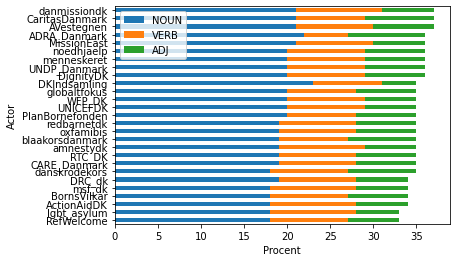

In [25]:
df_words_vis = df_words.drop(['ELSE_WORD', 'TOTAL', 'Total_three'], axis=1)
df_words_vis.set_index("Actor",drop=True,inplace=True)

df_words_vis.plot(kind='barh', stacked=True)
plt.xlabel("Procent")
plt.ylabel("Actor")
plt.savefig('Pct_words')